# 幸福度と健康は関係あるのか？
1254820149　川名優弥

# 初めに
私は長生きや健康についてピンときて長生きといっても長生きできればできるほど幸福度は高くなるのか？それとも減るのか？ある一定で変わるのか？気になったので幸福度と健康について調べました。

In [1]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [2]:
# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [3]:
# 基本統計量を表示
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


# 1.地域ごとの幸福度について

ここで最初に地域ごとの幸福度について調べました。

Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64


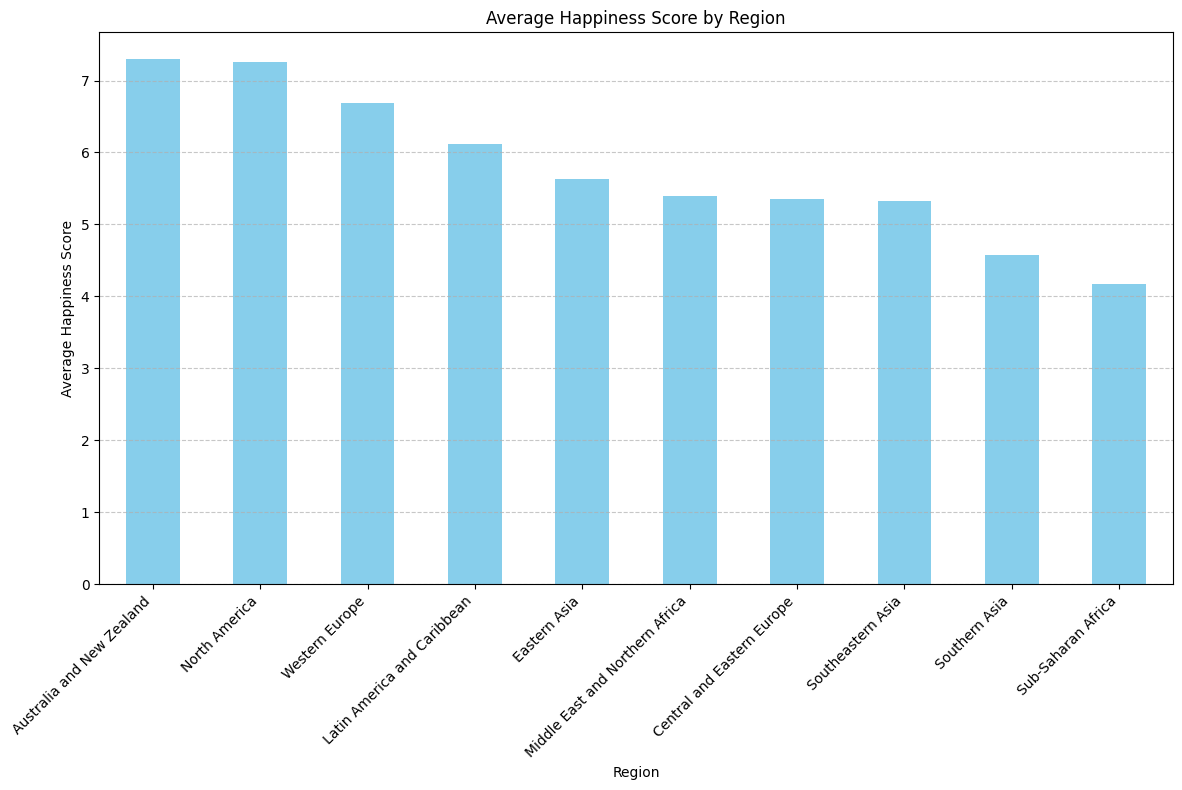

In [22]:
region_data = df.dropna(subset=['Region', 'Happiness Score'])

region_happiness = region_data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
region_happiness.plot(kind='bar', color='skyblue')
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('happiness_by_region.png')

print(region_happiness)

このグラフは地域ごとに分けて平均幸福度を調べました。
この結果から第一位にオーストラリア・ニュージーランド、第二位に北アメリカ、第三位に西ヨーロッパとなりました。
これを見る感じでは地域がばばらばらで規則性は見えませんでした。

# 2.地域ごとの健康について
次に、地域ごとの健康について調べました。

Region
Australia and New Zealand          0.880522
Western Europe                     0.867451
North America                      0.843505
Eastern Asia                       0.842034
Central and Eastern Europe         0.675183
Middle East and Northern Africa    0.662170
Latin America and Caribbean        0.656305
Southeastern Asia                  0.619363
Southern Asia                      0.497250
Sub-Saharan Africa                 0.261646
Name: Health (Life Expectancy), dtype: float64


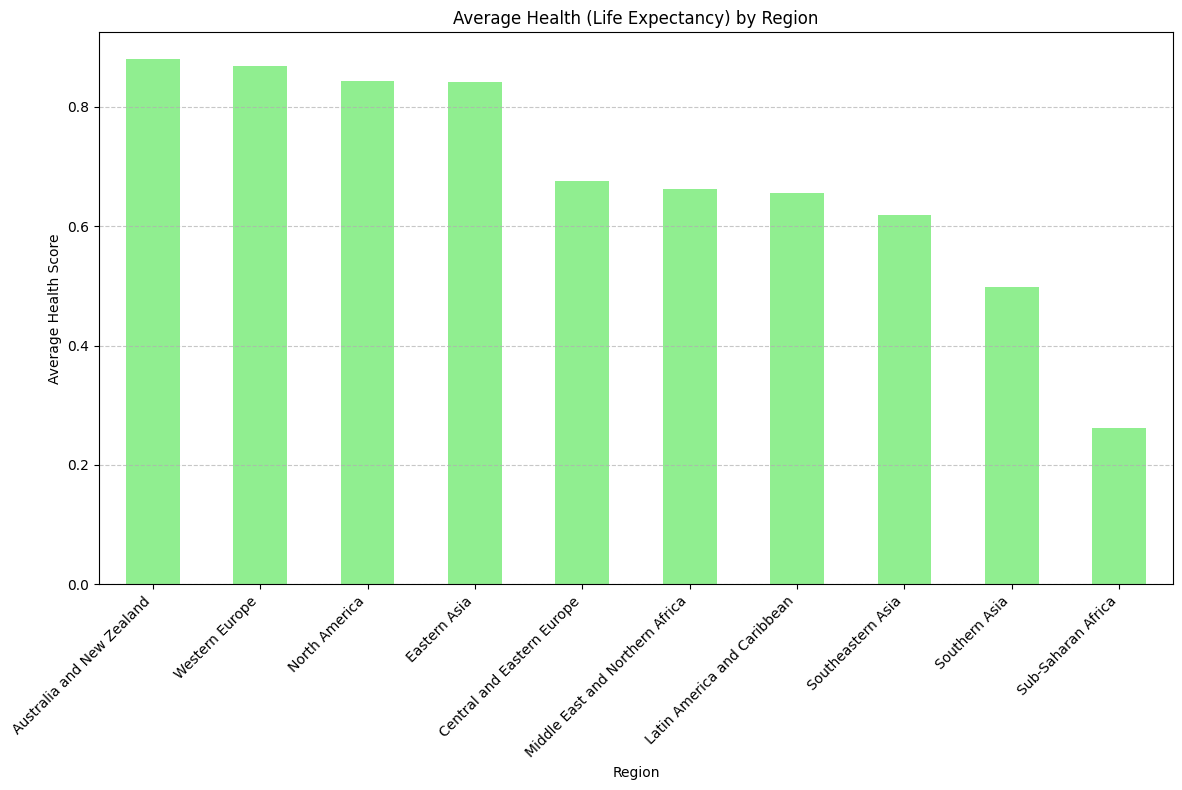

In [20]:
df = pd.read_csv('world_happiness_report.csv')

health_region_data = df.dropna(subset=['Region', 'Health (Life Expectancy)'])

region_health = health_region_data.groupby('Region')['Health (Life Expectancy)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
region_health.plot(kind='bar', color='lightgreen')
plt.title('Average Health (Life Expectancy) by Region')
plt.xlabel('Region')
plt.ylabel('Average Health Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('health_by_region.png')

print(region_health)

これも幸福度同様のグラフを作成しました。
結果を見ていきましょう!
おお！結果は第一位、第二位、第三位は幸福度の時と同じですね！
第四位以降は違いますが大体同じですね

# 3.幸福度と健康の関係性

さっきの上二つで大体わかってしまったかもしれませんが幸福度と健康の関係性についてまとめましょう

In [14]:
year_summary = df.groupby('year').count()
print(year_summary[['Happiness Score', 'Health (Life Expectancy)', 'Happiness Rank']])

print(df.columns.tolist())

      Happiness Score  Health (Life Expectancy)  Happiness Rank
year                                                           
2015              158                       158             158
2016              157                       157             157
2017                0                         0               0
2018                0                         0               0
2019                0                         0               0
2020                0                         0               0
2021                0                         0               0
2022                0                         0               0
['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'year']


In [15]:
print("Year 2017 non-null counts:")
print(df[df['year'] == 2017].notnull().sum())

print("\nSample rows from 2017:")
print(df[df['year'] == 2017].head())

Year 2017 non-null counts:
Unnamed: 0                       155
Country                          155
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                           155
Health (Life Expectancy)           0
Freedom                          155
Trust (Government Corruption)      0
Generosity                       155
Dystopia Residual                  0
year                             155
dtype: int64

Sample rows from 2017:
     Unnamed: 0      Country Region  Happiness Rank  Happiness Score  \
315         315       Norway    NaN             NaN              NaN   
316         316      Denmark    NaN             NaN              NaN   
317         317      Iceland    NaN             NaN              NaN   
318         318  Switzerland    NaN             NaN              NaN   
319         319      Finland    NaN             NaN       

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


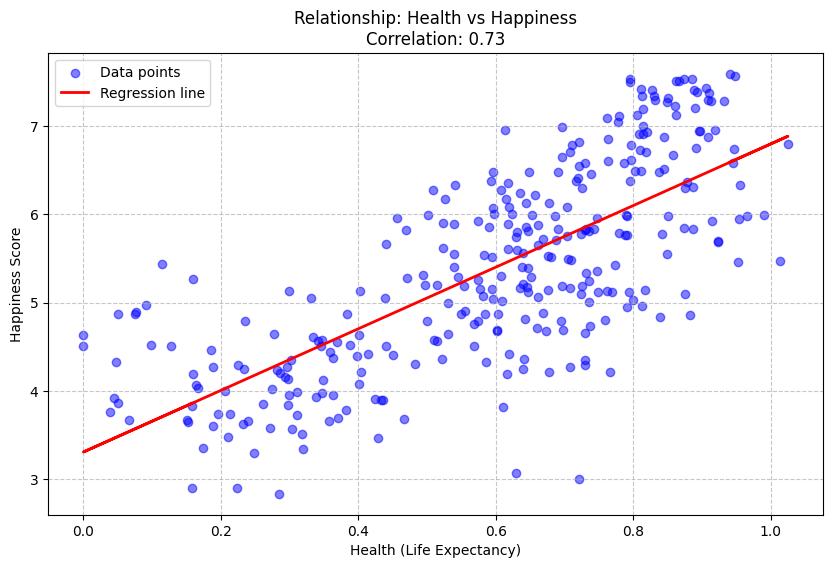

In [21]:
df = pd.read_csv('world_happiness_report.csv')
clean_df = df.dropna(subset=['Happiness Score', 'Health (Life Expectancy)'])

x = clean_df['Health (Life Expectancy)']
y = clean_df['Happiness Score']

correlation = x.corr(y)

plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.5, color='blue', label='Data points')

m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, color='red', linewidth=2, label='Regression line')

plt.title(f'Relationship: Health vs Happiness\nCorrelation: {correlation:.2f}')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()